<a href="https://colab.research.google.com/github/rutujabhosale24/CNN_CIFAR10/blob/main/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement : To design a convolution neural network for classifying the images in CIFAR10 dataset

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

from keras import regularizers

from tensorflow.keras.layers import BatchNormalization

Loading the Dataset

In [ ]:
CIFAR_data=tf.keras.datasets.cifar10

In [ ]:
(x_train,y_train),(x_test,y_test)=CIFAR_data.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
print("The shape of  x_train",x_train.shape)      # (no. of records,height,breadth,depth=RGB(Red,Green,Blue))
print("The shape of  y_train",y_train.shape)
print("The shape of  x_test",x_test.shape)
print("The shape of  y_test",y_test.shape)

The shape of  x_train (50000, 32, 32, 3)
The shape of  y_train (50000, 1)
The shape of  x_test (10000, 32, 32, 3)
The shape of  y_test (10000, 1)


In [ ]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

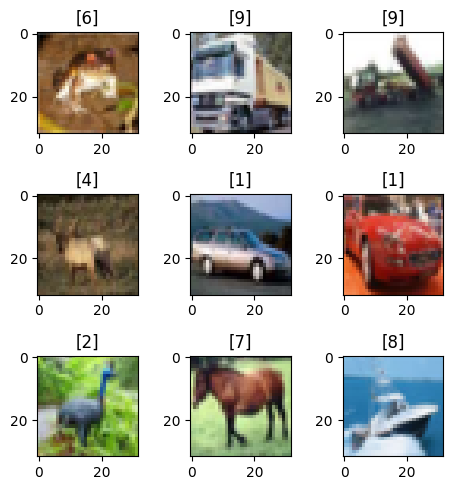

In [ ]:
fig=plt.figure(figsize=(5,5))

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.tight_layout()

plt.show()

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
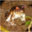

In [ ]:
x_train[0]

Preprocessing

In [ ]:
# Type casting to float32

x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

In [ ]:
# Normalize the image  (0-1 range all images)
X_train=x_train/255.0     # (0-dark,255-bright) devide for each (RGB)
X_test=x_test/255.0

In [ ]:
X_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

One hot encoding of the labels

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
len(np.unique(y_train))

10

In [ ]:
n_class=10

Y_train=to_categorical(y_train,n_class)
Y_test=to_categorical(y_test,n_class)

print("Shape after one hot encoding",Y_train.shape)
print("Shape after one hot encoding",Y_test.shape)

Show after one hot encoding (50000, 10)
Show after one hot encoding (10000, 10)


CNN Architecture

In [ ]:
 from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation="relu"))

model.add(Dense(10,activation="softmax"))    # Output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()    # output Shape (None-Batch Size)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,029,642 (7.74 MB)

 Trainable params: 2,029,642 (7.74 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history=model.fit(X_train,Y_train,batch_size=64,epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.3829 - loss: 1.6775 - val_accuracy: 0.6201 - val_loss: 1.0797
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6523 - loss: 0.9862 - val_accuracy: 0.6845 - val_loss: 0.9010
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7356 - loss: 0.7606 - val_accuracy: 0.7307 - val_loss: 0.7792
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7928 - loss: 0.5886 - val_accuracy: 0.7544 - val_loss: 0.7188
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8413 - loss: 0.4547 - val_accuracy: 0.7580 - val_loss: 0.7338
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8852 - loss: 0.3305 - val_accuracy: 0.7533 - val_loss: 0.8053
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9159 - loss: 0.2413 - val_accuracy: 0.7618 - val_loss: 0.8501
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9448 - loss: 0.1614 - val_

Model is Overfit beacause Training Accuracy=95% and Validation Accuracy=75%

Thats why We do Regularization

Adding the dropouts to the CNN model

Dropouts=drop the some neurons from calculation

In [ ]:
 from tensorflow.keras.layers import Dropout

In [ ]:
model_d=Sequential()
model_d.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)))
model_d.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))

model_d.add(MaxPool2D(pool_size=(2,2)))

model_d.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model_d.add(Conv2D(filters=256,kernel_size=(3,3),activation="relu"))

model_d.add(MaxPool2D(pool_size=(2,2)))

model_d.add(Flatten())
model_d.add(Dense(256,activation="relu"))

# add dropout after dense layer
model_d.add(Dropout(0.4))

model_d.add(Dense(10,activation="softmax"))    # Output layer

In [ ]:
model_d.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history_d=model_d.fit(X_train,Y_train,batch_size=64,epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.3454 - loss: 1.7668 - val_accuracy: 0.5866 - val_loss: 1.1712
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5917 - loss: 1.1566 - val_accuracy: 0.6752 - val_loss: 0.9201
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6806 - loss: 0.9064 - val_accuracy: 0.7100 - val_loss: 0.8365
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7340 - loss: 0.7648 - val_accuracy: 0.7272 - val_loss: 0.8049
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7741 - loss: 0.6487 - val_accuracy: 0.7466 - val_loss: 0.7543
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7981 - loss: 0.5723 - val_accuracy: 0.7526 - val_loss: 0.7070
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8240 - loss: 0.4942 - val_accuracy: 0.7707 - val_loss: 0.6970
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8531 - loss: 0.4195 - val_a

Adding the Regularziation To the CNN

In [ ]:
 from keras import regularizers

In [ ]:
reg=0.0001  # penalty(lambda)
model_r=Sequential()
model_r.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)))
model_r.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))

model_r.add(MaxPool2D(pool_size=(2,2)))

model_r.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model_r.add(Conv2D(filters=256,kernel_size=(3,3),activation="relu"))

model_r.add(MaxPool2D(pool_size=(2,2)))

model_r.add(Flatten())
model_r.add(Dense(256,activation="relu",kernel_regularizer=regularizers.l2(reg)))   # Add regularization at Dense layer

model_r.add(Dense(10,activation="softmax"))    # Output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_r.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history_r=model_r.fit(X_train,Y_train,batch_size=64,epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.3871 - loss: 1.6905 - val_accuracy: 0.6146 - val_loss: 1.1162
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6583 - loss: 1.0119 - val_accuracy: 0.7030 - val_loss: 0.8995
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7423 - loss: 0.7823 - val_accuracy: 0.7385 - val_loss: 0.8078
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7932 - loss: 0.6511 - val_accuracy: 0.7656 - val_loss: 0.7675
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8320 - loss: 0.5509 - val_accuracy: 0.7636 - val_loss: 0.7665
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8688 - loss: 0.4593 - val_accuracy: 0.7593 - val_loss: 0.8597
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8967 - loss: 0.3917 - val_accuracy: 0.7730 - val_loss: 0.8694
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9219 - loss: 0.3333 - val

Apply the Batch Normalization to CNN

Batch Normalization can add on convolution layer or Dnese layer (Except maxPooling and Flatten)

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
model_b=Sequential()
model_b.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)))
model_b.add(BatchNormalization())
model_b.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model_b.add(BatchNormalization())

model_b.add(MaxPool2D(pool_size=(2,2)))

model_b.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model_b.add(BatchNormalization())
model_b.add(Conv2D(filters=256,kernel_size=(3,3),activation="relu"))
model_b.add(BatchNormalization())


model_b.add(MaxPool2D(pool_size=(2,2)))

model_b.add(Flatten())
model_b.add(Dense(256,activation="relu"))
model_b.add(BatchNormalization())

model_b.add(Dense(10,activation="softmax"))    # Output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_b.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history_b=model_b.fit(X_train,Y_train,batch_size=64,epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.5099 - loss: 1.4441 - val_accuracy: 0.6467 - val_loss: 1.0267
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7443 - loss: 0.7386 - val_accuracy: 0.7072 - val_loss: 0.8695
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8213 - loss: 0.5175 - val_accuracy: 0.7297 - val_loss: 0.8243
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8811 - loss: 0.3508 - val_accuracy: 0.7748 - val_loss: 0.6820
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9235 - loss: 0.2243 - val_accuracy: 0.7751 - val_loss: 0.7472
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9550 - loss: 0.1385 - val_accuracy: 0.7846 - val_loss: 0.7719
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9694 - loss: 0.0982 - val_accuracy: 0.7400 - val_loss: 1.0659
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9708 - loss: 0.0856 - val